In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print("Seaborn version: ", sns.__version__)

Seaborn version:  0.9.0


In [3]:
game_data = pd.read_csv('D1_2015_Processed_Stats.csv')
print("Number of records= ", game_data.shape[0])
game_data.head()
#game_data.info()

Number of records=  5149


,game_id,game_date,principal_team,opponent_team,home_team,principal_score,opponent_score,delta_avg_points_per_game,delta_field_goals_pct,delta_avg_off_rebounds,delta_avg_free_throws_att,delta_avg_free_throws_pct,delta_avg_turnovers,delta_win_pct,game_result
0,59217c6a-34da-48ef-8753-a7b1e5bb5998,2015-11-15,UNC Asheville,Western Carolina,False,81,90,6.0,0.075,-3.0,4.0,-0.008,2.0,0.0,LOSS
1,1bb9c45c-80e8-40e4-80f3-84a795135434,2015-11-15,South Dakota,Cal State Northridge,True,76,72,-4.0,-0.041,-5.0,-13.0,0.111,1.0,0.0,WIN
2,347c62d0-c3ca-4688-9fa0-aa21fa5746f9,2015-11-15,Wright State,Cal State Northridge,True,67,72,6.0,-0.052,-7.0,-6.0,0.276,-5.0,1.0,LOSS
3,2bb9a40e-50d9-4a5b-95a5-a49e609df45f,2015-11-15,Northern Illinois,Wright State,True,65,59,0.5,0.030,8.5,1.5,-0.144,4.0,0.0,WIN
4,07c058c3-ad3c-4af0-a78a-feeda651785e,2015-11-15,Clemson,UTSA,True,78,45,10.0,0.011,-1.0,7.0,-0.005,-17.0,1.0,WIN


In [5]:
game_data.describe()

,principal_score,opponent_score,delta_avg_points_per_game,delta_field_goals_pct,delta_avg_off_rebounds,delta_avg_free_throws_att,delta_avg_free_throws_pct,delta_avg_turnovers,delta_win_pct
count,5149.000000,5149.000000,5149.000000,5149.000000,5149.000000,5149.000000,5149.000000,5149.000000,5149.000000
mean,72.380268,72.368227,-0.136139,-0.000780,0.019842,0.025055,-0.000613,0.003747,0.000102
std,12.207601,12.427285,9.659450,0.049404,2.767151,5.255297,0.071905,2.456641,0.322479
min,33.000000,25.000000,-59.000000,-0.300000,-15.000000,-31.000000,-0.424000,-17.000000,-1.000000
25%,64.000000,64.000000,-6.200000,-0.029694,-1.652174,-3.052632,-0.043143,-1.457143,-0.196970
50%,72.000000,72.000000,-0.399038,-0.001138,0.000000,0.000000,-0.001460,-0.029412,0.000000
75%,80.000000,80.000000,5.813187,0.027038,1.686667,3.095238,0.042188,1.422609,0.183333
max,119.000000,125.000000,79.000000,0.306000,12.000000,33.000000,0.683500,14.000000,1.000000


In [4]:
# How many games with win game_result = 1?
game_data['game_result'].value_counts()

LOSS    2606
WIN     2543
Name: game_result, dtype: int64

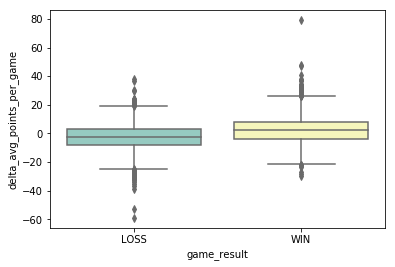

In [6]:
#sns.set(style="whitegrid")
sns.boxplot(x="game_result", y="delta_avg_points_per_game",data =game_data, palette="Set3")

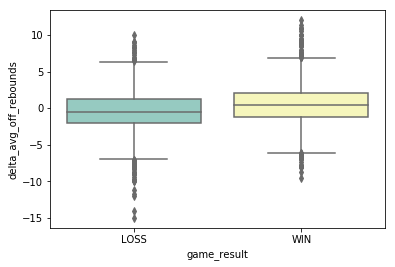

In [7]:
sns.boxplot(x="game_result", y="delta_avg_off_rebounds",data =game_data, palette="Set3")

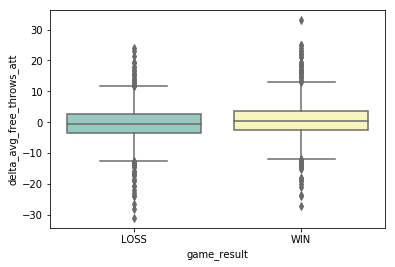

In [9]:
sns.boxplot(x="game_result", y="delta_avg_free_throws_att",data =game_data, palette="Set3")

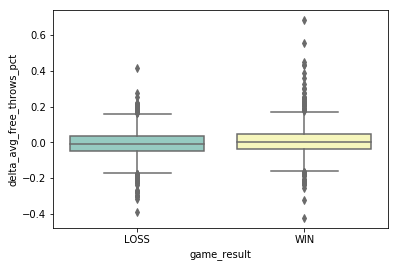

In [10]:
sns.boxplot(x="game_result", y="delta_avg_free_throws_pct",data =game_data, palette="Set3")

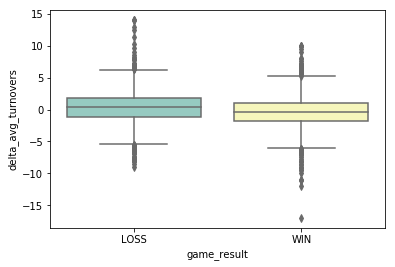

In [12]:
sns.boxplot(x="game_result", y="delta_avg_turnovers",data =game_data, palette="Set3")

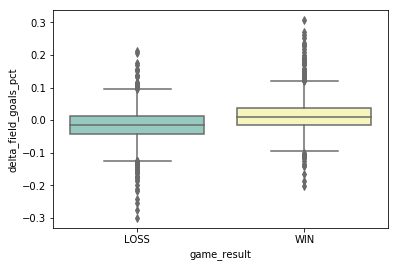

In [13]:
sns.boxplot(x="game_result", y="delta_field_goals_pct",data =game_data, palette="Set3")

In [31]:
game_data[game_data['game_result']=='WIN'].groupby(['home_team']).count()

,game_id,game_date,principal_team,opponent_team,principal_score,opponent_score,delta_avg_points_per_game,delta_field_goals_pct,delta_avg_off_rebounds,delta_avg_free_throws_att,delta_avg_free_throws_pct,delta_avg_turnovers,delta_win_pct,game_result
home_team,,,,,,,,,,,,,,
False,923,923,923,923,923,923,923,923,923,923,923,923,923,923
True,1620,1620,1620,1620,1620,1620,1620,1620,1620,1620,1620,1620,1620,1620


In [41]:
principal_home_wins = game_data[(game_data['game_result']=='WIN') & (game_data['home_team']== True)].shape[0]
print("Principal Home Wins= ",principal_home_wins)
opponent_home_wins = game_data[(game_data['game_result']=='LOSS') & (game_data['home_team']== False)].shape[0]
print("Opponent Home Wins= ",opponent_home_wins)
percent_home_wins = (principal_home_wins + opponent_home_wins) / game_data.shape[0]
percent_home_wins

Principal Home Wins=  1620
Opponent Home Wins=  1699


0.6445911827539328

In [36]:
game_data[(game_data['game_result']=='LOSS') & (game_data['home_team']== False)].shape[0]

(1699, 15)

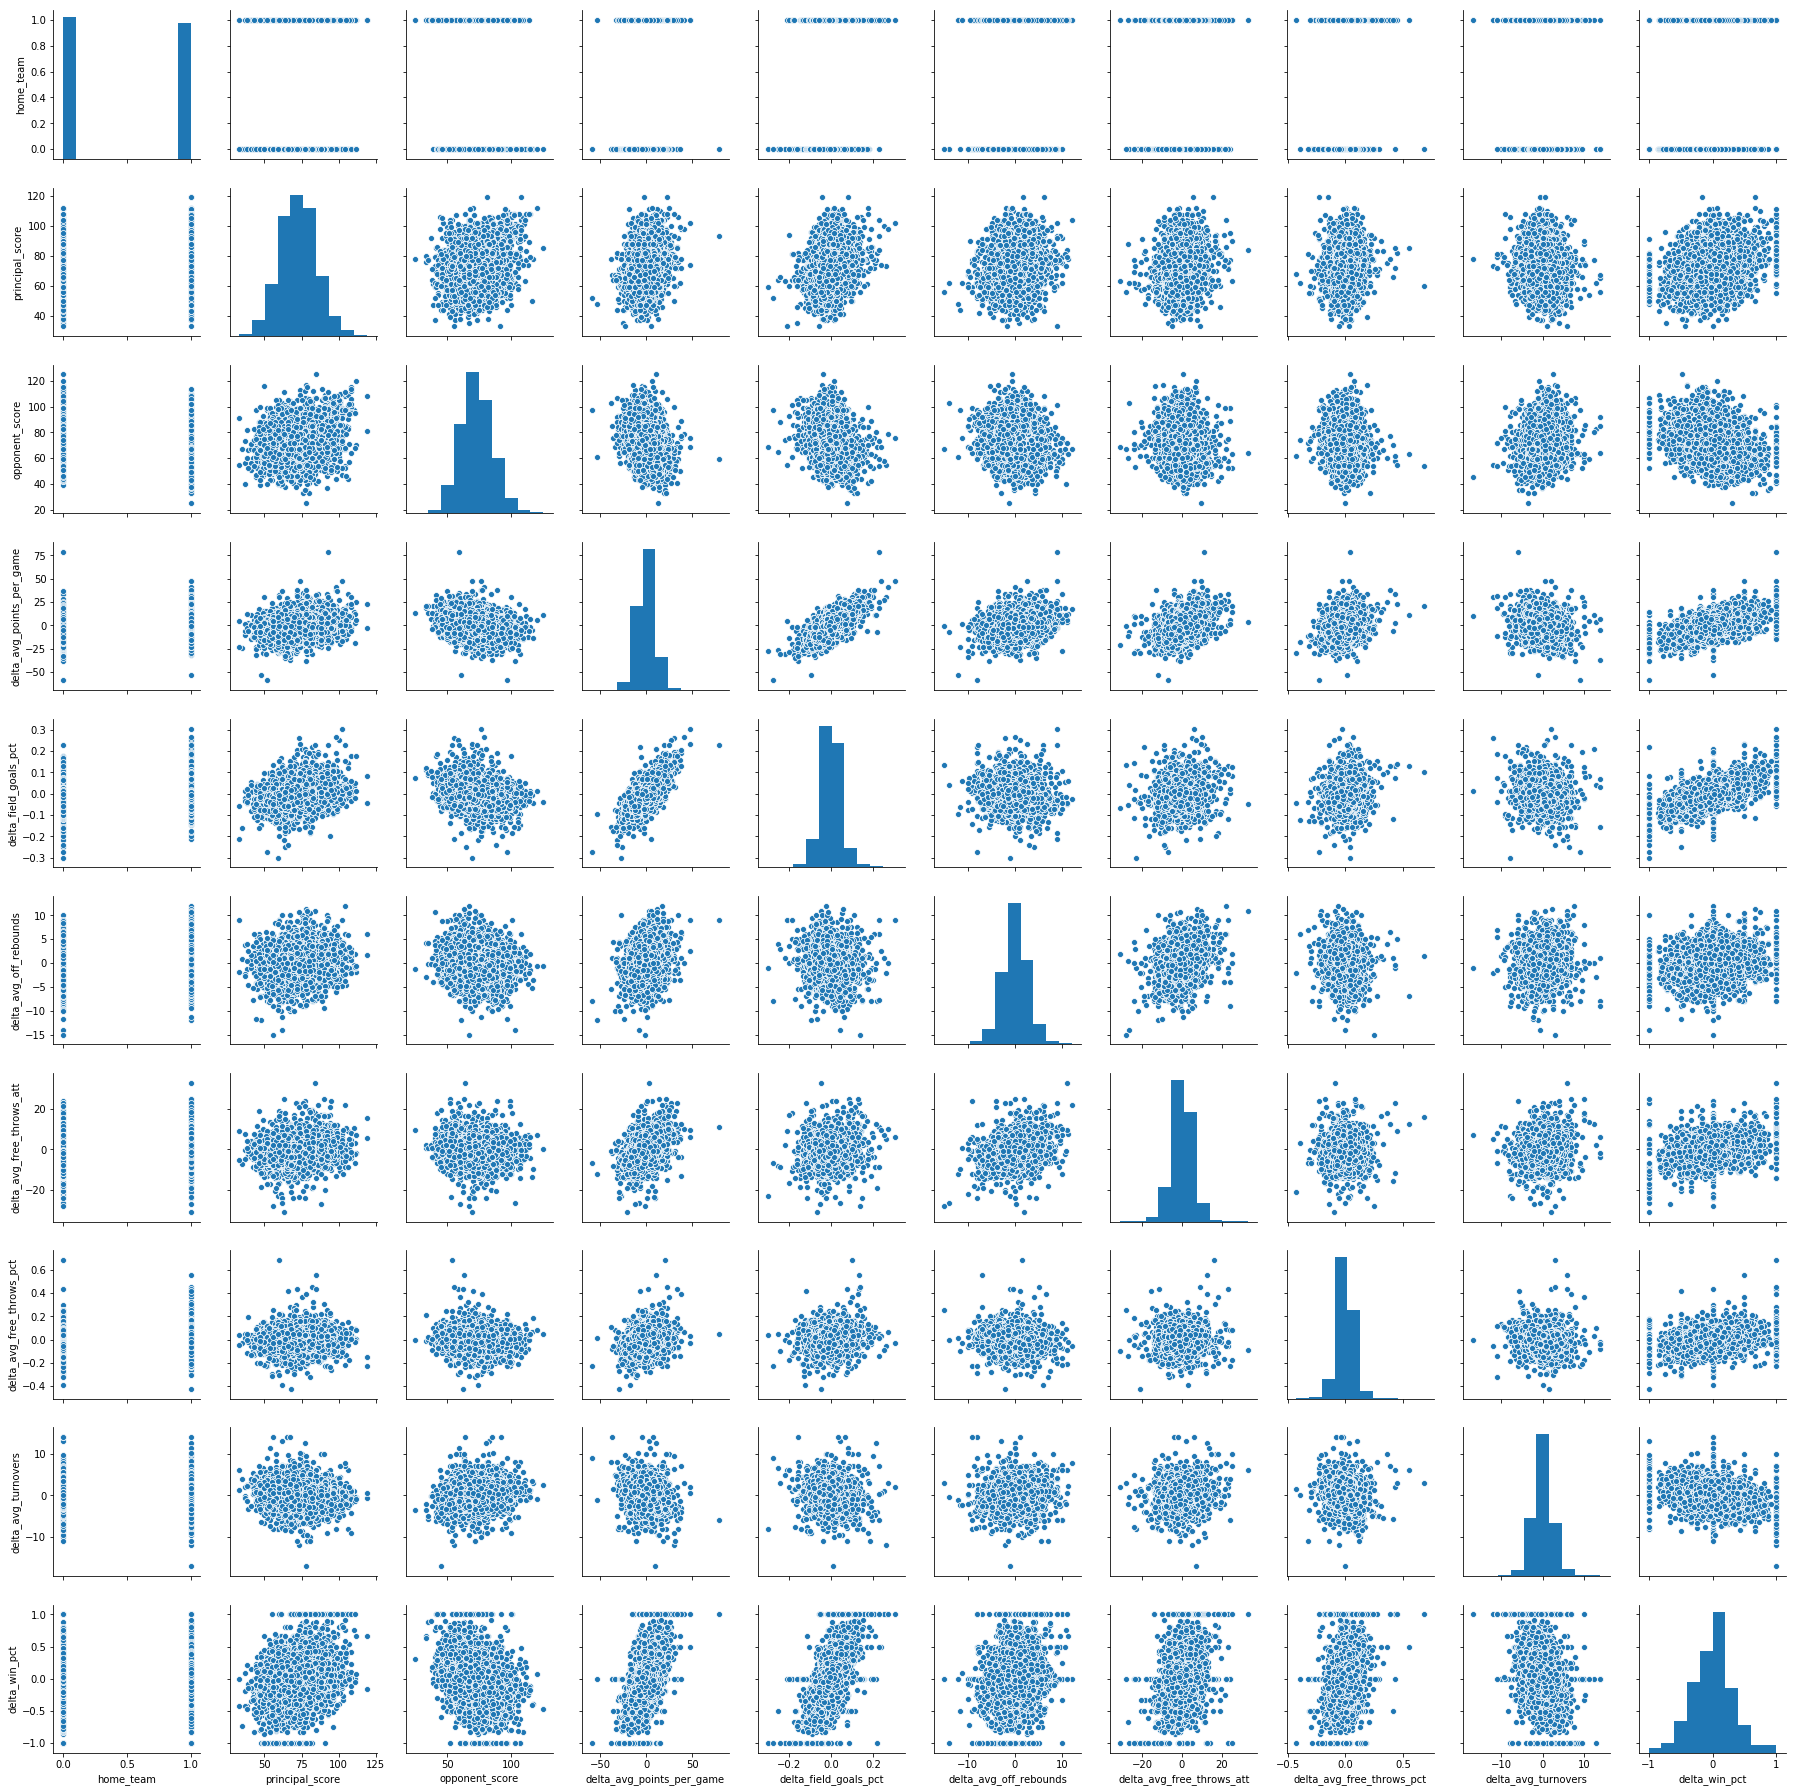

In [42]:
sns.pairplot(game_data)